In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 23.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install tweepy

     |████████████████████████████████| 63 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 61.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install twitter

     |████████████████████████████████| 50 kB 1.2 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [8]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [11]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [12]:
client = MongoClient(mongod_connect)
db = client.gp15 # or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [15]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [16]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19" 

In [17]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 03 20:21:43 +0000 2021'
'Wed Nov 03 19:32:21 +0000 2021'
'Wed Nov 03 19:21:49 +0000 2021'
'Wed Nov 03 19:15:19 +0000 2021'
'Wed Nov 03 16:15:39 +0000 2021'
'Wed Nov 03 15:59:19 +0000 2021'
'Wed Nov 03 12:18:34 +0000 2021'
'Wed Nov 03 11:47:17 +0000 2021'
'Wed Nov 03 10:55:20 +0000 2021'
'Wed Nov 03 09:43:38 +0000 2021'
'Wed Nov 03 09:39:19 +0000 2021'
'Wed Nov 03 09:14:29 +0000 2021'
'Wed Nov 03 00:53:53 +0000 2021'
'Wed Nov 03 00:22:31 +0000 2021'
'Tue Nov 02 23:56:02 +0000 2021'
'Tue Nov 02 23:55:52 +0000 2021'
'Tue Nov 02 22:35:00 +0000 2021'
'Tue Nov 02 21:44:36 +0000 2021'
'Tue Nov 02 16:13:24 +0000 2021'
'Tue Nov 02 14:56:38 +0000 2021'
'Tue Nov 02 14:52:11 +0000 2021'
'Tue Nov 02 14:41:36 +0000 2021'
'Tue Nov 02 10:30:09 +0000 2021'
'Tue Nov 02 00:58:26 +0000 2021'
'Tue Nov 02 00:03:46 +0000 2021'
'Tue Nov 02 00:00:26 +0000 2021'
'Mon Nov 01 23:22:59 +0000 2021'
'Mon Nov 01 22:00:00 +0000 2021'
'Mon Nov 01 21:50:20 +0000 2021'
'Mon Nov 01 21:01:02 +0000 2021'
'Mon Nov 0

In [18]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Oct 27 15:20:05 +0000 2021'
'Wed Oct 27 15:20:05 +0000 2021'
'Wed Oct 27 15:20:05 +0000 2021'
'Wed Oct 27 15:20:04 +0000 2021'
'Wed Oct 27 15:20:04 +0000 2021'
'Wed Oct 27 15:20:03 +0000 2021'
'Wed Oct 27 15:20:03 +0000 2021'
'Wed Oct 27 15:20:03 +0000 2021'
'Wed Oct 27 15:20:03 +0000 2021'
'Wed Oct 27 15:20:03 +0000 2021'
'Wed Oct 27 15:20:02 +0000 2021'
'Wed Oct 27 15:20:01 +0000 2021'
'Wed Oct 27 15:20:01 +0000 2021'
'Wed Oct 27 15:20:01 +0000 2021'
'Wed Oct 27 15:20:00 +0000 2021'
'Wed Oct 27 15:20:00 +0000 2021'
'Wed Oct 27 15:20:00 +0000 2021'
'Wed Oct 27 15:20:00 +0000 2021'
'Wed Oct 27 15:20:00 +0000 2021'
'Wed Oct 27 15:20:00 +0000 2021'
'Wed Oct 27 15:20:00 +0000 2021'
'Wed Oct 27 15:20:00 +0000 2021'
'Wed Oct 27 15:20:00 +0000 2021'
'Wed Oct 27 15:19:59 +0000 2021'
'Wed Oct 27 15:19:59 +0000 2021'
'Wed Oct 27 15:19:57 +0000 2021'
'Wed Oct 27 15:19:57 +0000 2021'
'Wed Oct 27 15:19:56 +0000 2021'
'Wed Oct 27 15:19:56 +0000 2021'
'Wed Oct 27 15:19:56 +0000 2021'
'Wed Oct 2

'Wed Oct 27 15:18:31 +0000 2021'
'Wed Oct 27 15:18:30 +0000 2021'
'Wed Oct 27 15:18:29 +0000 2021'
'Wed Oct 27 15:18:28 +0000 2021'
'Wed Oct 27 15:18:28 +0000 2021'
'Wed Oct 27 15:18:28 +0000 2021'
'Wed Oct 27 15:18:27 +0000 2021'
'Wed Oct 27 15:18:26 +0000 2021'
'Wed Oct 27 15:18:26 +0000 2021'
'Wed Oct 27 15:18:24 +0000 2021'
'Wed Oct 27 15:18:24 +0000 2021'
'Wed Oct 27 15:18:24 +0000 2021'
'Wed Oct 27 15:18:24 +0000 2021'
'Wed Oct 27 15:18:24 +0000 2021'
'Wed Oct 27 15:18:23 +0000 2021'
'Wed Oct 27 15:18:23 +0000 2021'
'Wed Oct 27 15:18:22 +0000 2021'
'Wed Oct 27 15:18:22 +0000 2021'
'Wed Oct 27 15:18:22 +0000 2021'
'Wed Oct 27 15:18:21 +0000 2021'
'Wed Oct 27 15:18:20 +0000 2021'
'Wed Oct 27 15:18:20 +0000 2021'
'Wed Oct 27 15:18:19 +0000 2021'
'Wed Oct 27 15:18:19 +0000 2021'
'Wed Oct 27 15:18:17 +0000 2021'
'Wed Oct 27 15:18:17 +0000 2021'
'Wed Oct 27 15:18:16 +0000 2021'
'Wed Oct 27 15:18:16 +0000 2021'
'Wed Oct 27 15:18:16 +0000 2021'
'Wed Oct 27 15:18:16 +0000 2021'
'Wed Oct 2

'Wed Oct 27 15:17:01 +0000 2021'
'Wed Oct 27 15:17:00 +0000 2021'
'Wed Oct 27 15:16:59 +0000 2021'
'Wed Oct 27 15:16:58 +0000 2021'
'Wed Oct 27 15:16:58 +0000 2021'
'Wed Oct 27 15:16:58 +0000 2021'
'Wed Oct 27 15:16:58 +0000 2021'
'Wed Oct 27 15:16:57 +0000 2021'
'Wed Oct 27 15:16:57 +0000 2021'
'Wed Oct 27 15:16:57 +0000 2021'
'Wed Oct 27 15:16:57 +0000 2021'
'Wed Oct 27 15:16:56 +0000 2021'
'Wed Oct 27 15:16:56 +0000 2021'
'Wed Oct 27 15:16:56 +0000 2021'
'Wed Oct 27 15:16:56 +0000 2021'
'Wed Oct 27 15:16:54 +0000 2021'
'Wed Oct 27 15:16:54 +0000 2021'
'Wed Oct 27 15:16:54 +0000 2021'
'Wed Oct 27 15:16:54 +0000 2021'
'Wed Oct 27 15:16:53 +0000 2021'
'Wed Oct 27 15:16:53 +0000 2021'
'Wed Oct 27 15:16:53 +0000 2021'
'Wed Oct 27 15:16:52 +0000 2021'
'Wed Oct 27 15:16:51 +0000 2021'
'Wed Oct 27 15:16:51 +0000 2021'
'Wed Oct 27 15:16:51 +0000 2021'
'Wed Oct 27 15:16:51 +0000 2021'
'Wed Oct 27 15:16:50 +0000 2021'
'Wed Oct 27 15:16:50 +0000 2021'
'Wed Oct 27 15:16:50 +0000 2021'
'Wed Oct 2

'Wed Oct 27 15:15:26 +0000 2021'
'Wed Oct 27 15:15:25 +0000 2021'
'Wed Oct 27 15:15:25 +0000 2021'
'Wed Oct 27 15:15:24 +0000 2021'
'Wed Oct 27 15:15:24 +0000 2021'
'Wed Oct 27 15:15:24 +0000 2021'
'Wed Oct 27 15:15:24 +0000 2021'
'Wed Oct 27 15:15:23 +0000 2021'
'Wed Oct 27 15:15:22 +0000 2021'
'Wed Oct 27 15:15:22 +0000 2021'
'Wed Oct 27 15:15:21 +0000 2021'
'Wed Oct 27 15:15:21 +0000 2021'
'Wed Oct 27 15:15:20 +0000 2021'
'Wed Oct 27 15:15:19 +0000 2021'
'Wed Oct 27 15:15:19 +0000 2021'
'Wed Oct 27 15:15:19 +0000 2021'
'Wed Oct 27 15:15:19 +0000 2021'
'Wed Oct 27 15:15:17 +0000 2021'
'Wed Oct 27 15:15:16 +0000 2021'
'Wed Oct 27 15:15:16 +0000 2021'
'Wed Oct 27 15:15:16 +0000 2021'
'Wed Oct 27 15:15:16 +0000 2021'
'Wed Oct 27 15:15:16 +0000 2021'
'Wed Oct 27 15:15:16 +0000 2021'
'Wed Oct 27 15:15:15 +0000 2021'
'Wed Oct 27 15:15:15 +0000 2021'
'Wed Oct 27 15:15:14 +0000 2021'
'Wed Oct 27 15:15:14 +0000 2021'
'Wed Oct 27 15:15:14 +0000 2021'
'Wed Oct 27 15:15:13 +0000 2021'
'Wed Oct 2

'Wed Oct 27 15:13:42 +0000 2021'
'Wed Oct 27 15:13:42 +0000 2021'
'Wed Oct 27 15:13:41 +0000 2021'
'Wed Oct 27 15:13:41 +0000 2021'
'Wed Oct 27 15:13:39 +0000 2021'
'Wed Oct 27 15:13:39 +0000 2021'
'Wed Oct 27 15:13:39 +0000 2021'
'Wed Oct 27 15:13:37 +0000 2021'
'Wed Oct 27 15:13:37 +0000 2021'
'Wed Oct 27 15:13:35 +0000 2021'
'Wed Oct 27 15:13:35 +0000 2021'
'Wed Oct 27 15:13:34 +0000 2021'
'Wed Oct 27 15:13:34 +0000 2021'
'Wed Oct 27 15:13:33 +0000 2021'
'Wed Oct 27 15:13:33 +0000 2021'
'Wed Oct 27 15:13:33 +0000 2021'
'Wed Oct 27 15:13:33 +0000 2021'
'Wed Oct 27 15:13:32 +0000 2021'
'Wed Oct 27 15:13:32 +0000 2021'
'Wed Oct 27 15:13:32 +0000 2021'
'Wed Oct 27 15:13:32 +0000 2021'
'Wed Oct 27 15:13:32 +0000 2021'
'Wed Oct 27 15:13:31 +0000 2021'
'Wed Oct 27 15:13:31 +0000 2021'
'Wed Oct 27 15:13:30 +0000 2021'
'Wed Oct 27 15:13:30 +0000 2021'
'Wed Oct 27 15:13:30 +0000 2021'
'Wed Oct 27 15:13:29 +0000 2021'
'Wed Oct 27 15:13:29 +0000 2021'
'Wed Oct 27 15:13:29 +0000 2021'
'Wed Oct 2

'Wed Oct 27 15:11:47 +0000 2021'
'Wed Oct 27 15:11:46 +0000 2021'
'Wed Oct 27 15:11:46 +0000 2021'
'Wed Oct 27 15:11:46 +0000 2021'
'Wed Oct 27 15:11:46 +0000 2021'
'Wed Oct 27 15:11:46 +0000 2021'
'Wed Oct 27 15:11:46 +0000 2021'
'Wed Oct 27 15:11:46 +0000 2021'
'Wed Oct 27 15:11:45 +0000 2021'
'Wed Oct 27 15:11:44 +0000 2021'
'Wed Oct 27 15:11:44 +0000 2021'
'Wed Oct 27 15:11:44 +0000 2021'
'Wed Oct 27 15:11:44 +0000 2021'
'Wed Oct 27 15:11:43 +0000 2021'
'Wed Oct 27 15:11:43 +0000 2021'
'Wed Oct 27 15:11:42 +0000 2021'
'Wed Oct 27 15:11:41 +0000 2021'
'Wed Oct 27 15:11:41 +0000 2021'
'Wed Oct 27 15:11:40 +0000 2021'
'Wed Oct 27 15:11:40 +0000 2021'
'Wed Oct 27 15:11:40 +0000 2021'
'Wed Oct 27 15:11:40 +0000 2021'
'Wed Oct 27 15:11:39 +0000 2021'
'Wed Oct 27 15:11:38 +0000 2021'
'Wed Oct 27 15:11:38 +0000 2021'
'Wed Oct 27 15:11:38 +0000 2021'
'Wed Oct 27 15:11:37 +0000 2021'
'Wed Oct 27 15:11:37 +0000 2021'
'Wed Oct 27 15:11:37 +0000 2021'
'Wed Oct 27 15:11:36 +0000 2021'
'Wed Oct 2

'Wed Oct 27 15:09:38 +0000 2021'
'Wed Oct 27 15:09:38 +0000 2021'
'Wed Oct 27 15:09:38 +0000 2021'
'Wed Oct 27 15:09:38 +0000 2021'
'Wed Oct 27 15:09:36 +0000 2021'
'Wed Oct 27 15:09:36 +0000 2021'
'Wed Oct 27 15:09:35 +0000 2021'
'Wed Oct 27 15:09:35 +0000 2021'
'Wed Oct 27 15:09:35 +0000 2021'
'Wed Oct 27 15:09:34 +0000 2021'
'Wed Oct 27 15:09:34 +0000 2021'
'Wed Oct 27 15:09:32 +0000 2021'
'Wed Oct 27 15:09:32 +0000 2021'
'Wed Oct 27 15:09:31 +0000 2021'
'Wed Oct 27 15:09:31 +0000 2021'
'Wed Oct 27 15:09:31 +0000 2021'
'Wed Oct 27 15:09:31 +0000 2021'
'Wed Oct 27 15:09:30 +0000 2021'
'Wed Oct 27 15:09:30 +0000 2021'
'Wed Oct 27 15:09:30 +0000 2021'
'Wed Oct 27 15:09:29 +0000 2021'
'Wed Oct 27 15:09:29 +0000 2021'
'Wed Oct 27 15:09:28 +0000 2021'
'Wed Oct 27 15:09:27 +0000 2021'
'Wed Oct 27 15:09:27 +0000 2021'
'Wed Oct 27 15:09:27 +0000 2021'
'Wed Oct 27 15:09:27 +0000 2021'
'Wed Oct 27 15:09:26 +0000 2021'
'Wed Oct 27 15:09:26 +0000 2021'
'Wed Oct 27 15:09:26 +0000 2021'
'Wed Oct 2

'Wed Oct 27 15:07:45 +0000 2021'
'Wed Oct 27 15:07:45 +0000 2021'
'Wed Oct 27 15:07:45 +0000 2021'
'Wed Oct 27 15:07:44 +0000 2021'
'Wed Oct 27 15:07:44 +0000 2021'
'Wed Oct 27 15:07:43 +0000 2021'
'Wed Oct 27 15:07:43 +0000 2021'
'Wed Oct 27 15:07:42 +0000 2021'
'Wed Oct 27 15:07:42 +0000 2021'
'Wed Oct 27 15:07:42 +0000 2021'
'Wed Oct 27 15:07:42 +0000 2021'
'Wed Oct 27 15:07:41 +0000 2021'
'Wed Oct 27 15:07:41 +0000 2021'
'Wed Oct 27 15:07:39 +0000 2021'
'Wed Oct 27 15:07:37 +0000 2021'
'Wed Oct 27 15:07:36 +0000 2021'
'Wed Oct 27 15:07:36 +0000 2021'
'Wed Oct 27 15:07:36 +0000 2021'
'Wed Oct 27 15:07:36 +0000 2021'
'Wed Oct 27 15:07:36 +0000 2021'
'Wed Oct 27 15:07:35 +0000 2021'
'Wed Oct 27 15:07:35 +0000 2021'
'Wed Oct 27 15:07:34 +0000 2021'
'Wed Oct 27 15:07:34 +0000 2021'
'Wed Oct 27 15:07:34 +0000 2021'
'Wed Oct 27 15:07:33 +0000 2021'
'Wed Oct 27 15:07:33 +0000 2021'
'Wed Oct 27 15:07:33 +0000 2021'
'Wed Oct 27 15:07:33 +0000 2021'
'Wed Oct 27 15:07:32 +0000 2021'
'Wed Oct 2

'Wed Oct 27 15:05:49 +0000 2021'
'Wed Oct 27 15:05:49 +0000 2021'
'Wed Oct 27 15:05:47 +0000 2021'
'Wed Oct 27 15:05:47 +0000 2021'
'Wed Oct 27 15:05:47 +0000 2021'
'Wed Oct 27 15:05:47 +0000 2021'
'Wed Oct 27 15:05:46 +0000 2021'
'Wed Oct 27 15:05:46 +0000 2021'
'Wed Oct 27 15:05:46 +0000 2021'
'Wed Oct 27 15:05:45 +0000 2021'
'Wed Oct 27 15:05:44 +0000 2021'
'Wed Oct 27 15:05:44 +0000 2021'
'Wed Oct 27 15:05:44 +0000 2021'
'Wed Oct 27 15:05:41 +0000 2021'
'Wed Oct 27 15:05:41 +0000 2021'
'Wed Oct 27 15:05:41 +0000 2021'
'Wed Oct 27 15:05:40 +0000 2021'
'Wed Oct 27 15:05:40 +0000 2021'
'Wed Oct 27 15:05:40 +0000 2021'
'Wed Oct 27 15:05:39 +0000 2021'
'Wed Oct 27 15:05:39 +0000 2021'
'Wed Oct 27 15:05:39 +0000 2021'
'Wed Oct 27 15:05:39 +0000 2021'
'Wed Oct 27 15:05:38 +0000 2021'
'Wed Oct 27 15:05:38 +0000 2021'
'Wed Oct 27 15:05:37 +0000 2021'
'Wed Oct 27 15:05:37 +0000 2021'
'Wed Oct 27 15:05:36 +0000 2021'
'Wed Oct 27 15:05:36 +0000 2021'
'Wed Oct 27 15:05:35 +0000 2021'
'Wed Oct 2

'Wed Oct 27 15:04:09 +0000 2021'
'Wed Oct 27 15:04:09 +0000 2021'
'Wed Oct 27 15:04:09 +0000 2021'
'Wed Oct 27 15:04:08 +0000 2021'
'Wed Oct 27 15:04:08 +0000 2021'
'Wed Oct 27 15:04:08 +0000 2021'
'Wed Oct 27 15:04:08 +0000 2021'
'Wed Oct 27 15:04:07 +0000 2021'
'Wed Oct 27 15:04:07 +0000 2021'
'Wed Oct 27 15:04:07 +0000 2021'
'Wed Oct 27 15:04:06 +0000 2021'
'Wed Oct 27 15:04:05 +0000 2021'
'Wed Oct 27 15:04:05 +0000 2021'
'Wed Oct 27 15:04:04 +0000 2021'
'Wed Oct 27 15:04:04 +0000 2021'
'Wed Oct 27 15:04:04 +0000 2021'
'Wed Oct 27 15:04:04 +0000 2021'
'Wed Oct 27 15:04:03 +0000 2021'
'Wed Oct 27 15:04:03 +0000 2021'
'Wed Oct 27 15:04:03 +0000 2021'
'Wed Oct 27 15:04:03 +0000 2021'
'Wed Oct 27 15:04:03 +0000 2021'
'Wed Oct 27 15:04:02 +0000 2021'
'Wed Oct 27 15:04:02 +0000 2021'
'Wed Oct 27 15:04:01 +0000 2021'
'Wed Oct 27 15:04:01 +0000 2021'
'Wed Oct 27 15:04:01 +0000 2021'
'Wed Oct 27 15:04:00 +0000 2021'
'Wed Oct 27 15:04:00 +0000 2021'
'Wed Oct 27 15:03:59 +0000 2021'
'Wed Oct 2

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1453376570517700608&oauth_consumer_key=uHvizo6EmsBOVBzm5Rda1PlrT&oauth_nonce=3129206438410183252&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1635971363&oauth_token=60388598-MNOLnSnLK8ZJwWh2isDw0ojr0NXqc57nmNJ4ML4Z4&oauth_version=1.0&q=covid19&oauth_signature=ofzhYqIlOCQ6HmXoeWIV8kiB6fo%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

In [19]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

2673
2348


In [23]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [41]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

In [42]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: André Levy: Ivermectin vs The Great Reset
text: RT @DianeShears: People of faith and the COVID vaccine | by Jon Rappoport 

Refusing the COVID vaccine should be a personal mandate

Vaccin…
----
name: Hana Care
text: How Covid-19 affected my throat. I was diagnosed with Covid 19 positive on Monday. I was presented with sore throat… https://t.co/Uo8Eb9MiS2
----
name: Tony MacIntyre
text: RT @PharmacyNS: COVID-19 Walk-in Vaccine Clinics - OCT 27!

Looking to get your Covid-19 vaccine? Head to any of the pharmacies listed - No…
----
name: Health406
text: There were 994 new COVID cases reported yesterday. There are currently 463 persons hospitalized with COVID-19 in Mo… https://t.co/QIU4tARd15
----
name: Laffy
text: RT @Laurie_Garrett: Study: 185 long #COVID19 sufferers vs 181 COVID survivors w/no lingering disease finds:
- severe initial COVID increase…
----
name: Sandy Skipper
text: RT @Laurie_Garrett: Study: 185 long #COVID19 sufferers vs 181 COVID survivors w/no lingering dis

In [43]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}})

In [44]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,6182f10ab266650c83917909,Wed Oct 27 15:11:44 +0000 2021,1453378889254768641,1453378889254768641,RT @DianeShears: People of faith and the COVID...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,2,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,6182f10eb266650c839179ed,Wed Oct 27 15:10:00 +0000 2021,1453378453944766478,1453378453944766478,How Covid-19 affected my throat. I was diagnos...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
2,6182f114b266650c83917ae9,Wed Oct 27 15:08:04 +0000 2021,1453377968634572803,1453377968634572803,RT @PharmacyNS: COVID-19 Walk-in Vaccine Clini...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1,0,False,False,en,NaN,NaN,NaN,NaN,NaN
3,6182f0f3b266650c83917485,Wed Oct 27 15:18:56 +0000 2021,1453380701651406857,1453380701651406857,There were 994 new COVID cases reported yester...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
4,6182f114b266650c83917b07,Wed Oct 27 15:07:53 +0000 2021,1453377922669056005,1453377922669056005,RT @Laurie_Garrett: Study: 185 long #COVID19 s...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,...,37,0,False,False,en,False,NaN,NaN,NaN,NaN
5,6182f114b266650c83917ae6,Wed Oct 27 15:08:05 +0000 2021,1453377969796239364,1453377969796239364,RT @Laurie_Garrett: Study: 185 long #COVID19 s...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,37,0,False,False,en,False,NaN,NaN,NaN,NaN
6,6182f113b266650c83917acd,Wed Oct 27 15:08:17 +0000 2021,1453378020836663301,1453378020836663301,RT @Laurie_Garrett: Study: 185 long #COVID19 s...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,37,0,False,False,en,False,NaN,NaN,NaN,NaN
7,6182f110b266650c83917a21,Wed Oct 27 15:09:34 +0000 2021,1453378342732935173,1453378342732935173,RT @Laurie_Garrett: Study: 185 long #COVID19 s...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,37,0,False,False,en,False,NaN,NaN,NaN,NaN
8,6182f10fb266650c83917a05,Wed Oct 27 15:09:52 +0000 2021,1453378418863714304,1453378418863714304,RT @Laurie_Garrett: Study: 185 long #COVID19 s...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,37,0,False,False,en,False,NaN,NaN,NaN,NaN
9,6182f10fb266650c839179fc,Wed Oct 27 15:09:55 +0000 2021,1453378432671404032,1453378432671404032,RT @Laurie_Garrett: Study: 185 long #COVID19 s...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,37,0,False,False,en,False,NaN,NaN,NaN,NaN


<AxesSubplot:>

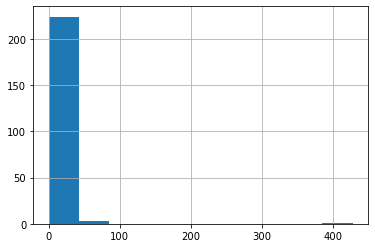

In [45]:
tweet_df["favorite_count"].hist()